Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel -> Restart) and then **run all cells** (in the menubar, select Cell -> Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nate Schaefer"
COLLABORATORS = "Nick Hageman"

---

# Introduction to Python (and Technical Background): Part II

In this notebook, we will primarily introduce working with 2D numpy arrays, pandas DataFrames, loading data, and some of the matplotlib/seaborn functionality. Note: to run all of the examples in this notebook, you also need to download frozenGrades.csv and CFB2019.csv from ICON and put them in the same directory as this notebook.

In [1]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from IPython.display import display

# also double-check to make sure that the needed csv files are present
import os.path
if not os.path.isfile('frozenGrades.csv'):
    print('Please download frozenGrades.csv and put in same directory as notebook')
if not os.path.isfile('CFB2019.csv'):
    print ('Please download CFB2019.csv and put in same directory as notebook')

First, as a reminder, if you want to learn more about some of the example functionality that you may see in these notebooks or your textbook, it can be helpful to try using the help function and/or visiting the online documentation. For example, chapter 2 of your textbook uses the randint function from np.random. In the cell below, if you uncomment the help call, you can see some documentation for np.random.randint. 

In [12]:
#help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    .. note::
        New code should use the ``integers`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distributi

## Example 1: Basics of working with a 2D numpy array

Below is an example of creating a 1D numpy array of 10 random integers (all ranging from 1 to 6) and a 4x5 2D numpy array of random integers (all ranging from 1 to 6). 

In [2]:
# create 1d array and 2d array
rolls_array = np.random.randint(1,7,size=10)
rolls_2d_array = np.random.randint(1,7,size=(4,5))

# print arrays and their shapes
print('rolls_array:', rolls_array)
print('Shape of rolls_array: ', rolls_array.shape)
print('rolls_2d_array:')
print(rolls_2d_array)
print('Shape of rolls_2d_array:', rolls_2d_array.shape)

rolls_array: [1 1 3 5 5 5 5 1 3 5]
Shape of rolls_array:  (10,)
rolls_2d_array:
[[1 5 4 6 2]
 [5 3 3 4 2]
 [1 3 6 4 2]
 [2 2 5 3 5]]
Shape of rolls_2d_array: (4, 5)


Recall with 1D arrays (and regular lists), you are allowed to use slicing to access a subset (slice) of the elements of the array/list (e.g., my_array[start:stop:step] to access start through stop (but not including stop) in increments of step). **With 2D numpy arrays, you are also allowed to slice across both dimensions at once (which you cannot do with "2D" lists). The result of the slicing is also called a 'view' of the array. For example, with the code below, we are accessing rows 0 and 1 in combination with columns 1, 2, and 3.** Note the use of single [] and the use of a comma to separate the row indices from the column indices.

In [3]:
rolls_2d_array[0:2,1:4]

array([[5, 4, 6],
       [3, 3, 4]])

With a 2D numpy array, you can also call functions, such as the sum function. Many of these functions allow you to perform the operations across different axes (e.g., rows vs. columns). (For more information, you can call the help function.) For example, to compute one summation within each column (e.g., summing all the row values for each column and thus effectly 'removing/collapsing' the row axis), you can specify that the axis should equal 0.

In [ ]:
#help(np.sum)
# axis = 0 corresponds to rows so this will sum all of the row values 
# in each column (the 'rows' axis will be removed/collapsed)
col_sums = np.sum(rolls_2d_array,axis=0) # sum the columns
print("col_sums=",col_sums)
np.sum(rolls_2d_array,axis=1) # sum the rows

## Example 2: Basics of working with a pandas DataFrame

In many machine learning applications, you will often be working with tabular data (e.g., features in columns and examples in rows), and thus it is convenient to work with a pandas DataFrame object, which is specifically designed to represent tabular data with optionally labeled columns and rows (note that pandas refers to **row labels as index labels**). The columns of a pandas DataFrames are also allowed to have different types. Below we create a DataFrame directly from our 2D numpy array created above. Since we did not yet specify labels for the columns/rows, increasing integer values are used by default. 

In [14]:
rolls_df = pd.DataFrame(rolls_2d_array)
display(rolls_df)

,0,1,2,3,4
0,1,5,4,6,2
1,5,3,3,4,2
2,1,3,6,4,2
3,2,2,5,3,5


Below we provide labels for the columns (and display the updated DataFrame):

In [15]:
# label columns
rolls_df.columns = ['roll_1','roll_2','roll_3','roll_4','roll_5'] 
display(rolls_df)

,roll_1,roll_2,roll_3,roll_4,roll_5
0,1,5,4,6,2
1,5,3,3,4,2
2,1,3,6,4,2
3,2,2,5,3,5


Below we provide labels for the rows (and display the updated DataFrame):

In [16]:
# label rows
rolls_df.index = ['player_1','player_2','player_3','player_4'] 
display(rolls_df)

,roll_1,roll_2,roll_3,roll_4,roll_5
player_1,1,5,4,6,2
player_2,5,3,3,4,2
player_3,1,3,6,4,2
player_4,2,2,5,3,5


Pandas provides a number of convenient ways to access subsets of a DataFrame (refer to online documentation and/or **pandas cheat sheet** on ICON). For example, you can access the data of an individual column by putting the label in square brackets. Below we access the column labeled 'roll_1':

In [17]:
rolls_df['roll_1']

player_1    1
player_2    5
player_3    1
player_4    2
Name: roll_1, dtype: int32

Aside: The above syntax may remind you of python dictionaries (a built-in datatype in python essentially storing key:value pairs -- see https://docs.python.org/3/tutorial/datastructures.html#dictionaries) where the key corresponds to the column label (and the 'values' are the columns of data). In fact, you can also initialize a pandas DataFrame with a dictionary. Below, we create an example DataFrame initialized with a dictionary.

In [7]:
# create example dictionary mapping string roll labels
# to lists of roll values (in this case, hard-coding example 
# values rather than calling the np.random.randint function 
# just to make the code easier to read)
extra_rolls_dict = {'roll_1': [2, 4, 5, 4], 
                    'roll_2': [2, 2, 5, 4], 
                    'roll_3': [4, 4, 4, 3], 
                    'roll_4': [3, 2, 6, 6],
                    'roll_5': [5, 2, 3, 3]}
print('roll_1 values:', extra_rolls_dict['roll_1'])
extra_rolls_df = pd.DataFrame(extra_rolls_dict, 
                              index=['player_1','player_2','player_3','player_4'])
display(extra_rolls_df)
print("extra_rolls_df['roll_1']:")
extra_rolls_df['roll_1']

roll_1 values: [2, 4, 5, 4]


,roll_1,roll_2,roll_3,roll_4,roll_5
player_1,2,2,4,3,5
player_2,4,2,4,2,2
player_3,5,5,4,6,3
player_4,4,4,3,6,3


extra_rolls_df['roll_1']:


player_1    2
player_2    4
player_3    5
player_4    4
Name: roll_1, dtype: int64

Using loc allows you to access a subset of the data by referring to **labels [row(s),column(s)]** (it also allows other options, such as passing in an array of boolean values -- uncomment the help function call to see more). In the example below, we extract all columns associated with the row labeled 'player_1' and then compute the summation of values using the sum function: 

In [18]:
#help(rolls_df.loc)
p1_rolls = rolls_df.loc['player_1',:] # [row(s), column(s)]
print(p1_rolls)
p1_sum = p1_rolls.sum()
print('p1_sum:', p1_sum)

p2_r3 = extra_rolls_df.loc['player_2','roll_3']
print('p2_r3:',p2_r3)


roll_1    1
roll_2    5
roll_3    4
roll_4    6
roll_5    2
Name: player_1, dtype: int32
p1_sum: 18
p2_r3: 4


Similarly to 2D numpy arrays, using functions such as sum can be applied to an entire DataFrame (with the ability to specify the axis, as needed). For example, below we compute the summation of each player's rolls:

In [19]:
player_sums = rolls_df.sum(axis=1) # sum each row (across columns)
print(player_sums)

player_1    18
player_2    17
player_3    16
player_4    17
dtype: int64


**Note that the default behavior for sum when applied to a pandas DataFrame with no arguments specified, unlike for 2D numpy arrays, is to compute the sum for each column (across all rows) rather than providing the overall sum (in a machine learning context, this often corresponds to computing one summation for each feature).** You can apply a sum function twice to compute an overall sum. For example, below we count how many rolls were greater than 3 across all players/rolls.

In [20]:
is_greater_than_3_df = rolls_df > 3
display(is_greater_than_3_df)
count = (is_greater_than_3_df.sum()).sum()
#count = np.sum(np.sum(is_greater_than_3_df)) # another option
print('Number of rolls greater than 3:', count)

,roll_1,roll_2,roll_3,roll_4,roll_5
player_1,False,True,True,True,False
player_2,True,False,False,True,False
player_3,False,False,True,True,False
player_4,False,False,True,False,True


Number of rolls greater than 3: 9


## Example 3: Working with data from a csv file (frozenGrades.csv)

Pandas provides a read_csv function for creating a pandas DataFrame from the data in a csv file. By default, the **first row in the csv file specifies the column labels** and you can also **specify a column within the csv file that contains the labels for the rows.** Below we load the data from the frozenGrades.csv file (containing example score data for a class) and display the resulting DataFrame.

In [25]:
df_grades = pd.read_csv("frozenGrades.csv",index_col=0)
display(df_grades)

,hw1,hw2,hw3,hw4,hw5,midterm,final
Anna,95,97,92,85,99,92,90
Elsa,98,99,97,95,100,95,100
Olaf,65,72,86,95,100,75,98
Sven,75,82,85,78,88,72,75
Kristoff,80,87,82,92,100,85,92
Hans,95,65,55,25,0,95,45
Oaken,85,75,80,79,87,78,72


Applying the mean function to the DataFrame will provide the mean of each column:

In [31]:
df_grades.mean()

hw1        84.714286
hw2        82.428571
hw3        82.428571
hw4        78.428571
hw5        82.000000
midterm    84.571429
final      81.714286
dtype: float64

Below we extract the column labels associated with the homework scores and create a corresponding DataFrame of just the homework scores. With this DataFrame, we then compute the average homework score for each student by computing the sum of the homework scores for each student divided by the number of homework assignments. (Note: in this case, it would likely be easier to just use the mean function.) 

In [37]:
hw_names = df_grades.columns[0:5]
hw_grades = df_grades[hw_names]
display(hw_grades)
avg_hw_grade = hw_grades.sum(axis=1)/len(hw_names) # recall axis=1 corresonds to collapsing the columns
#avg_hw_grade = hw_grades.mean(axis=1) # another way to compute the same thing
display(avg_hw_grade)

,hw1,hw2,hw3,hw4,hw5
Anna,95,97,92,85,99
Elsa,98,99,97,95,100
Olaf,65,72,86,95,100
Sven,75,82,85,78,88
Kristoff,80,87,82,92,100
Hans,95,65,55,25,0
Oaken,85,75,80,79,87


Anna        93.6
Elsa        97.8
Olaf        83.6
Sven        81.6
Kristoff    88.2
Hans        48.0
Oaken       81.2
dtype: float64

If we didn't remember about the sum or mean functions (or how to use them to extract sums/means within each row), we also could have more explictly written out the computation by refering to each column:

In [41]:
avg_hw_grade = (df_grades['hw1'] 
                + df_grades['hw2'] 
                + df_grades['hw3'] 
                + df_grades['hw4'] 
                + df_grades['hw5'])/5
display(avg_hw_grade)

Anna        93.6
Elsa        97.8
Olaf        83.6
Sven        81.6
Kristoff    88.2
Hans        48.0
Oaken       81.2
dtype: float64

With the average homework grades computed, we can now compute a final grade for each student:

In [42]:
final_grade = (0.5*avg_hw_grade 
              + 0.25*df_grades['midterm'] 
              + 0.25*df_grades['final'])
display(final_grade)

Anna        92.30
Elsa        97.65
Olaf        85.05
Sven        77.55
Kristoff    88.35
Hans        59.00
Oaken       78.10
dtype: float64

## Example 4: Working with the iris dataset from seaborn (including an introduction to matplotlib and seaborn plots)

Some python packages (such as seaborn and sklearn) provide the ability to load example datasets directly. These datasets are often famous datasets frequently used for teaching concepts about machine learning. One such dataset is the iris dataset (also used in chapter 3 of your book). The iris dataset contains four features (length and width of sepals and petals) of samples of three species of the iris flower (setosa, virginica and versicolor). Below we load this dataset using seaborn and display the first 5 rows of data.

In [8]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


When first loading any dataset, it is often useful to visualize the data in some way. The matplotlib and/or seaborn packages are often useful to help with basic data visualization. Matplotlib functionality, as the name suggests, often mimics the functionality available in Matlab. For example, below we use the functionality from matplotlib to display a basic scatterplot of petal-length measurements vs. sepal-width measurements (combined for all three species):

Text(0.5, 1.0, 'All species combined')

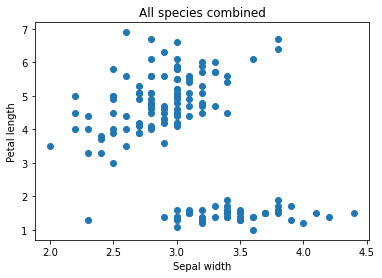

In [10]:
# basic scatter plot (all petal lengths vs. all sepal widths)
plt.scatter(iris_df['sepal_width'],iris_df['petal_length'])
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.title('All species combined')

Below we first extract the data from just one species ('setosa') and then display the same type of scatterplot using matplotlib:

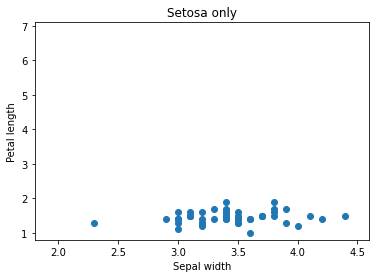

In [45]:
# extracting data from one species
setosa_df = iris_df.loc[iris_df['species'] == 'setosa']
#display(iris_df['species'] == 'setosa') #uncomment to better understand above line
plt.scatter(setosa_df['sepal_width'],setosa_df['petal_length'])
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.title('Setosa only')
# setting the axis limits so the scale looks somewhat similar to the prior scatter plot (optional)
plt.xlim(iris_df['sepal_width'].min()-0.2,iris_df['sepal_width'].max()+0.2);
plt.ylim(iris_df['petal_length'].min()-0.2,iris_df['petal_length'].max()+0.2);

The matplotlib documentation provides a number of examples that can give you a starting point for the syntax needed to create various plots. For example, below we create a scatter plot with a legend (which was motivated by the example code from the documentation at: https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html#sphx-glr-gallery-lines-bars-and-markers-scatter-with-legend-py)

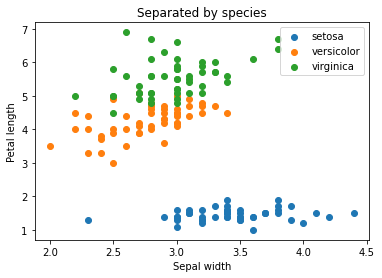

In [51]:
# creating a scatter plot separated by species with legend 
for species in iris_df['species'].unique():
    species_df = iris_df.loc[iris_df['species'] == species]
    plt.scatter(species_df['sepal_width'],species_df['petal_length'],label=species)
plt.legend()
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.title('Separated by species');

The seaborn package builds upon the functionality of the matplotlib package to make it convenient to create some plots. For example, below is an example of using the pairplot function to be able to see a number of scatterplots of the data all at once:

In [ ]:
sns.pairplot(data=iris_df, hue="species");

## Assignment: exploration of 2019 College Football dataset
For this assignment you will work with summarized data from the 2019-2020 college football season. The original csv file was downloaded from: https://www.kaggle.com/jeffgallini/college-football-team-stats-2019/data and was very slightly modified to remove the () around (OH) and (FL) in the team names Miami (OH) and Miami (FL). First we will load the data from the csv file and use head() to display the first five rows (although not all columns will be visible). We will also separately display the column names in order to see all the data available.

In [53]:
# read complete dataset
cfb_orig_df = pd.read_csv("CFB2019.csv")
# display first 5 rows (although not all columns are visible)
display(cfb_orig_df.head())
# also print all column names
print("Column names:")
for col in cfb_orig_df.columns:
    print("    " + col)

,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,Def Rank,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,Air Force (Mountain West),13,11-2,51,881,5483,6.22,55,421.8,17,...,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0-12,130,725,2918,4.02,14,243.2,83,...,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11-2,6,842,6640,7.89,76,510.8,20,...,29:59,3,11,17,28,4,6,10,18,1.38
3,Appalachian St. (Sun Belt),14,13-1,39,969,6064,6.26,65,433.1,26,...,31:19,7,10,14,24,3,6,9,15,1.07
4,Arizona (Pac-12),12,4-8,30,873,5281,6.05,42,440.1,120,...,27:24,89,4,11,15,6,12,18,-3,-0.25


Column names:
    Team
    Games
    Win-Loss
    Off Rank
    Off Plays
    Off Yards
    Off Yards/Play
    Off TDs
    Off Yards per Game
    Def Rank
    Def Plays
    Yards Allowed
    Yards/Play Allowed
    Off TDs Allowed
    Total TDs Allowed
    Yards Per Game Allowed
    First Down Rank
    First Down Runs
    First Down Passes
    First Down Penalties
    First Downs
    First Down Def Rank
    Opp First Down Runs
    Opp First Down Passes
    Opp First Down Penalties
    Opp First Downs
    4th Down Rank
    4th Attempts
    4th Conversions
    4th Percent
    4rd Down Def Rank
    Opp 4th Conversion
    Opp 4th Attempt
    Opponent 4th Percent
    Kickoff Return Def Rank
    Opp Kickoff Returns
    Kickoff Touchbacks
    Opponent Kickoff Return Yards
    Opp Kickoff Return Touchdowns Allowed
    Avg Yards per Kickoff Return Allowed
    Kickoff Return Rank
    Kickoffs Returned
    Kickoff Return Yards
    Kickoff Return Touchdowns
    Avg Yard per Kickoff Return
    Passin

In the original dataset, we notice that the team names really contain both the team name and the conference name and the wins and losses also appear in the same column. Thus, we next decide to split each of these columns into two. In addition to the teams/conferences and wins/losses, we also decide to also only focus on a small subset of the other data available: the rushing yards per game, the rushing yards allowed per game, the passing yards per game, and the passing yards allowed per game. We create a smaller pandas dataframe with this combined information. 

In [54]:
# break win-loss column into two separate columns
# by separating each string at the '-' character
w_l = np.array([w_l_str.split('-') for w_l_str in cfb_orig_df['Win-Loss']])
# extract first column as wins (and convert to integers)
wins = w_l[:,0].astype(int)
print('Wins: ', wins)
# extract second column as losses (and convert to integers)
losses = w_l[:,1].astype(int)
print('Losses: ', losses)

# also break teams column (which actually contains both teams and conferences) into 
# two separate columns 
team_conference = [t_c_str.split('(') for t_c_str in cfb_orig_df['Team']]
teams = [] # list
conferences = []
for t_c in team_conference:
    team = t_c[0][:-1] # use of -1 to also remove trailing ' ' -- all elements except last
    conference = t_c[1][:-1] # use of -1 to also remove trailing ')'
    teams.append(team)
    conferences.append(conference)
print('Teams: ', teams)
print('Conferences: ', conferences)

Wins:  [11  0 11 13  4  8  2  8  5  9  5 11 12  6  3  8  7  8  8  7 11 14  5  5
  4  5  4  6  6 11 11  6  4  7 12  7  3 10  4  6  8 10  7  3  8  7  8  5
  8 11 10  8 15  8  3  1 12  6  8  9  7  4 11  6  6 11  4  5  7  2  2  7
  4  5  3 11  7 13 12  8  1  4 12  5 11  8  4  3  2 10  5 10  2  4  4  8
  7  4  5  5  8  8  8  8  3  4  6  5  7  4  9 10  4  2  4 11  7  1  4  3
  9  8  8  8  6  5  9  7 10  8]
Losses:  [ 2 12  2  1  8  5 10  5  8  4  7  3  2  7  9  5  6  5  6  6  3  1  7  7
  8  7  8  7  7  3  2  7  8  6  2  6  9  5  8  7  5  3  6  9  5  6  5  7
  5  3  3  5  0  5  9 11  2  7  6  4  6  8  2  7  6  2  8  7  6 10 10  6
  8  7  9  2  6  1  2  5 11  8  2  7  2  5  8  9 10  3  7  3 10  8  8  5
  6  8  7  7  5  5  5  5  9  8  6  7  6  8  5  3  8 10  8  3  6 11  8  9
  5  5  5  5  7  7  4  6  4  5]
Teams:  ['Air Force', 'Akron', 'Alabama', 'Appalachian St.', 'Arizona', 'Arizona St.', 'Arkansas', 'Arkansas St.', 'Army West Point', 'Auburn', 'Ball St.', 'Baylor', 'Boise St.', 'Boston Col

In [55]:
# extract some of the existing columns as a starting point for our smaller dataset
cfb_df = cfb_orig_df[['Rushing Yards per Game',
                      'Rush Yards Per Game Allowed',
                      'Pass Yards Per Game',
                      'Pass Yards Per Game Allowed']]       
# add the extra columns we created above
cfb_df.insert(0,'Team',teams) # insert at column 0
cfb_df.insert(1,'Conference',conferences) 
cfb_df.insert(2,'Wins',wins) 
cfb_df.insert(3,'Losses',losses)
# display first 5 rows of this new dataset
cfb_df.head() 

,Team,Conference,Wins,Losses,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed
0,Air Force,Mountain West,11,2,298.5,100.5,123.2,219.1
1,Akron,MAC,0,12,47.6,213.5,195.6,200.4
2,Alabama,SEC,11,2,168.5,137.2,342.2,187.2
3,Appalachian St.,Sun Belt,13,1,231.4,129.4,201.7,206.7
4,Arizona,Pac-12,4,8,174.0,181.6,266.1,289.8


Below we decide to display all of the teams of the Big Ten conference sorted in descending order by the number of wins. 

In [56]:
display(cfb_df.loc[cfb_df['Conference'] == 'Big Ten'].sort_values(by=['Wins'],
                                                                  ascending=False))
#print(cfb_df['Conference'] == 'Big Ten') # returns Series of True/False values
#help(cfb_df.loc)
#help(cfb_df.sort_values)

,Team,Conference,Wins,Losses,Rushing Yards per Game,Rush Yards Per Game Allowed,Pass Yards Per Game,Pass Yards Per Game Allowed
77,Ohio St.,Big Ten,13,1,266.8,103.7,263.1,156.0
62,Minnesota,Big Ten,11,2,178.7,122.4,253.3,184.2
84,Penn St.,Big Ten,11,2,190.6,95.0,221.3,251.5
41,Iowa,Big Ten,10,3,137.6,112.5,228.9,195.7
128,Wisconsin,Big Ten,10,4,233.1,99.8,200.1,187.4
59,Michigan,Big Ten,9,4,150.7,121.7,250.8,185.5
40,Indiana,Big Ten,8,5,130.4,138.5,302.4,213.7
60,Michigan St.,Big Ten,7,6,127.2,113.8,244.8,207.8
39,Illinois,Big Ten,6,7,144.2,195.5,185.3,212.9
67,Nebraska,Big Ten,5,7,203.3,188.1,212.6,200.8


We can also try exploring the data using the pairplot function from seaborn:

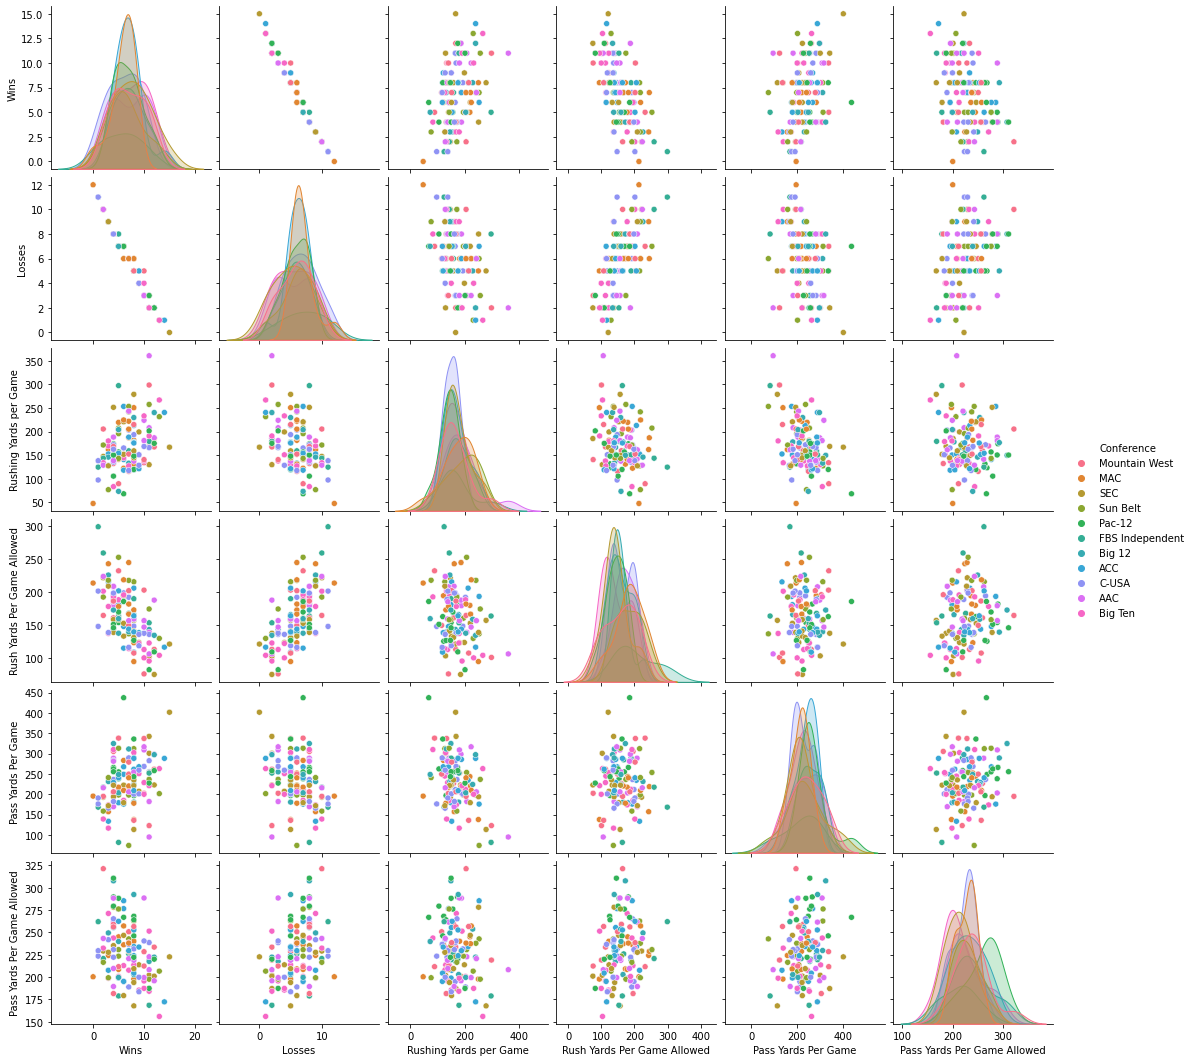

In [57]:
sns.pairplot(data=cfb_df,hue='Conference');

### Step 1: Using the smaller cfb_df created above, write Python code in the cell below to display the following for each conference:
   * Mean 'Rushing Yards per Game'
   * Mean 'Rush Yards Per Game Allowed'
   * Mean 'Pass Yards Per Game'
   * Mean 'Pass Yards Per Game Allowed'
   
Note: How you display this information is up to you. There are many options for doing this. One possibility would be to iterate over the unique conference names in order to extract a DataFrame for each conference (e.g., recall the example code for creating a scatter plot with legend for the iris dataset) and then compute/print the mean for each of the specified columns. Another option would be to explore the groupby functionality of pandas DataFrames (e.g., see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). If you use groupby, it is okay if you also display the means of the other two columns (wins/losses) in the display of a DataFrame.

In [107]:
# YOUR CODE HERE
# raise NotImplementedError()

for unit in cfb_df['Conference'].unique():
    conference_df = cfb_df.loc[cfb_df['Conference'] == unit]

    rush_yds = conference_df['Rushing Yards per Game']
    avg_rush_yds = rush_yds.mean()
    avg_rush_yds = round(avg_rush_yds, 1)
    
    rush_yds_all = conference_df['Rush Yards Per Game Allowed']
    avg_rush_yds_all = rush_yds_all.mean()
    avg_rush_yds_all = round(avg_rush_yds_all, 1)

    pass_yds = conference_df['Pass Yards Per Game']
    avg_pass_yds = pass_yds.mean()
    avg_pass_yds = round(avg_pass_yds, 1)

    pass_yds_all = conference_df['Pass Yards Per Game Allowed']
    avg_pass_yds_all = pass_yds_all.mean()
    avg_pass_yds_all = round(avg_pass_yds_all, 1)

    print(unit)
    print("Average Rushing Yards: ", avg_rush_yds)
    print("Average Rushing Yards Allowed: ", avg_rush_yds_all)
    print('Average Passing Yards: ', avg_pass_yds)
    print('Average Passing Yards Allowed: ', avg_pass_yds_all)

Mountain West
Average Rushing Yards:  164.8
Average Rushing Yards Allowed:  157.4
Average Passing Yards:  238.4
Average Passing Yards Allowed:  239.1
MAC
Average Rushing Yards:  174.4
Average Rushing Yards Allowed:  184.1
Average Passing Yards:  212.9
Average Passing Yards Allowed:  227.0
SEC
Average Rushing Yards:  177.1
Average Rushing Yards Allowed:  142.8
Average Passing Yards:  230.6
Average Passing Yards Allowed:  213.9
Sun Belt
Average Rushing Yards:  190.5
Average Rushing Yards Allowed:  185.3
Average Passing Yards:  218.8
Average Passing Yards Allowed:  229.4
Pac-12
Average Rushing Yards:  141.9
Average Rushing Yards Allowed:  143.1
Average Passing Yards:  268.8
Average Passing Yards Allowed:  260.0
FBS Independent
Average Rushing Yards:  175.7
Average Rushing Yards Allowed:  205.3
Average Passing Yards:  215.6
Average Passing Yards Allowed:  212.6
Big 12
Average Rushing Yards:  169.6
Average Rushing Yards Allowed:  157.4
Average Passing Yards:  256.7
Average Passing Yards All

### Step 2: Using any of the variables created previously, write Python code in the cell below to determine and display the name of the conference with the smallest mean number of 'Rushing Yards per Game'

Note: As in step 1, there are many possibilities for solving this problem. For example, if you wanted to take advantage of some of the functionality of DataFrames in pandas, one option would be to group by conference (note: indices become the conference names), sort the values by 'Rushing Yards per Game', and then print the first index. (This option likely requires looking up documentation for groupby, sort_values, and accessing the DataFrame indices.) Another example option (not involving figuring out how groupby or sort_values works) would involve iterating over the unique conference names (e.g., recall the example code for creating a scatter plot with legend for the iris dataset), and within each iteration, computing the mean 'Rushing Yards per Game' for that conference and (if that mean value is the smallest so far), updating the necessary variables to keep track of the minimum and corresponding conference of the minimum.

In [116]:
# YOUR CODE HERE

#raise NotImplementedError()
small_rush = 500


for unit in cfb_df['Conference'].unique():
    conference_df = cfb_df.loc[cfb_df['Conference'] == unit]

    rush_yds = conference_df['Rushing Yards per Game']
    avg_rush_yds = rush_yds.mean()
    avg_rush_yds = round(avg_rush_yds, 1)
    
    
    if avg_rush_yds < small_rush:
        small_rush = avg_rush_yds
        small_rush_conf = unit


print("The conference with the smallest mean number of rushing yards is:", small_rush_conf, "with ", small_rush, " ypg")



The conference with the smallest mean number of rushing yards is: Pac-12 with  141.9  ypg


commitment issues
